In [2]:
import pandas as pd
from functools import partial
import importlib

import prompts as promptlib
import gpt
import config
importlib.reload(promptlib)
importlib.reload(gpt)
importlib.reload(config)


#s = partial(PROMPT.format, rubric="dummy rubric")
#prompt = s(student="dummy student")

# read synthetic_smart_v2.csv
fname = "synthetic_smart_v2.csv"
df = pd.read_csv(fname)
display(df.head())

json_schema = promptlib.SMARTFeedback.model_json_schema()

def add_feedback_prompt(row: pd.Series):
    draft = promptlib.SMARTResponse(smart=row["smart"], plan=row["plan"])
    prompt = promptlib.PROMPT_SMART_FEEDBACK.format(
        FEEDBACK_PRINCIPLES=promptlib.FEEDBACK_PRINCIPLES,
        SMART_RUBRIC=promptlib.SMART_RUBRIC,
        SMART_EXAMPLE=promptlib.SMART_EXAMPLE,
        student_draft=draft.model_dump_json(indent=2),
        json_schema=json_schema,
    )
    return prompt

df['feedback_prompt'] = df.apply(add_feedback_prompt, axis=1)


config.source_dot_env()  # read api key
model = gpt.GPTModel()
outputs, meta = model(list(df["feedback_prompt"])[0:2])


,skill,prompt,tone,errors,smart,plan
0,voice volume,You're a student taking a course where you're ...,persuasive,NaN,Improve my voice volume during educational pre...,I will achieve this by practicing projecting m...
1,voice volume,You're a student taking a course where you're ...,objective,NaN,Increase my voice volume during presentations ...,I will start by setting aside time each day to...
2,pitch and intonation,You're a student taking a course where you're ...,authoritative,NaN,Use varying pitches and intonations in my pres...,I will achieve this by recording myself practi...
3,pitch and intonation,You're a student taking a course where you're ...,humorous,NaN,Use varied pitches and intonations in my prese...,I will achieve this by recording myself practi...
4,language use,You're a student taking a course where you're ...,sympathetic,NaN,Effortlessly incorporate precise and professio...,I will achieve this by first reviewing my past...


In [15]:
#print(df.shape)
print(f"price = ${model.compute_price(meta):.3f}")
feedback_objs = []
for response in outputs:
    feedback = promptlib.parseSMARTFeedback(response)
    feedback_objs.append(feedback)



price = $0.003


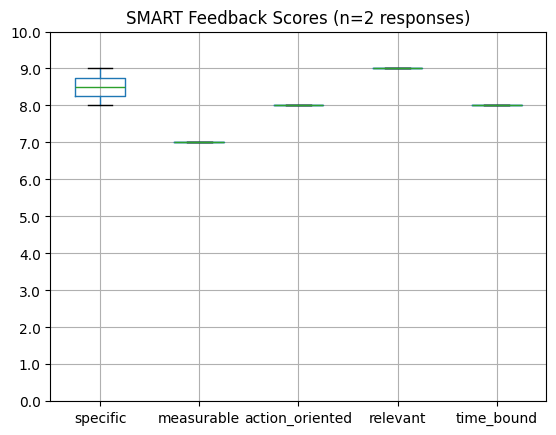

In analyzing your SMART goal and action plan, here are some reflections:

Specific: Your goal of improving voice volume during educational presentations is clear and specific, focusing on a key aspect of effective communication.
Measurable: You have outlined how you will measure the achievement of your goal by practicing in front of a mirror, recording yourself, and seeking feedback from others, which is a good approach.
Action-oriented: Your plan to practice projecting your voice and actively seeking feedback demonstrates a proactive approach towards achieving your goal.
Relevant: Improving voice volume is directly related to effective communication in educational settings, making it a relevant goal for your learning objectives.
Time-bound: Your goal is time-bound as it specifies that you will work on this skill for educational presentations within a defined timeframe.

Overall, your SMART goal and action plan align well with the assignment criteria. To enhance your work further, cons

In [25]:
# extract numerical scores
all_data = {}
for attr in promptlib.SMART:
    attr = attr.replace("-", "_")
    all_data[attr] = [getattr(obj, attr).score for obj in feedback_objs]

feedback_df = pd.DataFrame(all_data)
import matplotlib.pyplot as plt

feedback_df.boxplot()
# set y-axis to 0-10, tickmarks every 0.5
plt.yticks(range(0, 11), [f"{x:.1f}" for x in range(0, 11)])
plt.title(f"SMART Feedback Scores (n={len(feedback_df)} responses)")

plt.show()


# # boxplot of data
# import matplotlib.pyplot as plt
# plt.boxplot(data)
# plt.show()

# # histogram of same
# plt.hist(data, bins=10)

# # get summary statistics
# pd.Series(data).describe()


print(outputs[0])
